In [6]:
# Initial Exploratory analysis of the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import datetime as dt
%matplotlib inline

### Import and inspect data

In [7]:
# Import that data
df_train = pd.read_csv('../data/train_2016_v2.csv', parse_dates=['transactiondate'])
df_properties = pd.read_csv('../data/properties_2016.csv')
df_sample_submission = pd.read_csv('../data/sample_submission-2.csv')
df_dict = pd.read_excel('../data/zillow_data_dictionary.xlsx')

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
print('Training set contains {} property sales.'.format(df_train.shape[0]))
print('Each sale row consists of:\n'
      +' - the property that was sold ({})\n'.format(df_train.columns[0])
      +' - the log error between the Zestimate and the actual selling price ({})\n'.format(df_train.columns[1])
      +' - the date of the sale ({})\n'.format(df_train.columns[2]))
df_train.head(2)

Training set contains 90275 property sales.
Each sale row consists of:
 - the property that was sold (parcelid)
 - the log error between the Zestimate and the actual selling price (logerror)
 - the date of the sale (transactiondate)



,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01


In [9]:
print('Time period of the training set is 2016.')
print('Contains all the transactions before Oct 15th plus some of the transactions after Oct 15th.')
print('Test set is remainder of transactions after Oct 15th.')
print('')
print('Unusually, some properties are sold multiple times in the course of the training set:')
print(' - Property 11842707 is sold 3 times')
print(' - 123 properties are sold twice.')
print('')
print('The property dataset has 2985217 properties with {} features per property. Note that lots of the values are missing.'.format(df_properties.shape[1]))
df_properties.head(2)

Time period of the training set is 2016.
Contains all the transactions before Oct 15th plus some of the transactions after Oct 15th.
Test set is remainder of transactions after Oct 15th.

Unusually, some properties are sold multiple times in the course of the training set:
 - Property 11842707 is sold 3 times
 - 123 properties are sold twice.

The property dataset has 2985217 properties with 58 features per property. Note that lots of the values are missing.


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN


### Missing values

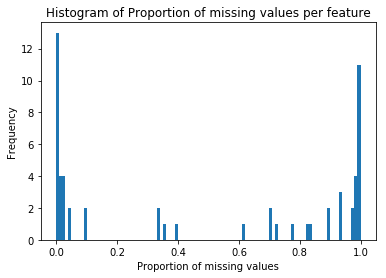

In [92]:
pp.plot()
pp.hist(df_properties.isnull().sum()/2985217, bins = 100)
pp.xlabel('Proportion of missing values')
pp.ylabel('Frequency')
pp.title('Histogram of Proportion of missing values per feature')
pp.show()

### Response variable (logerror)

Lets have a look at the $y$ values of the traning data (logerror), defined as
\begin{equation}
    logerror = \log(Zestimate) - \log(SalePrice).
\end{equation}
Actually, we will examine 
\begin{equation}
    e^{logerror} = \frac{Zestimate}{SalePrice},
\end{equation}
to see the fractional amount by which the Zestimate over or under estimates the sale price.

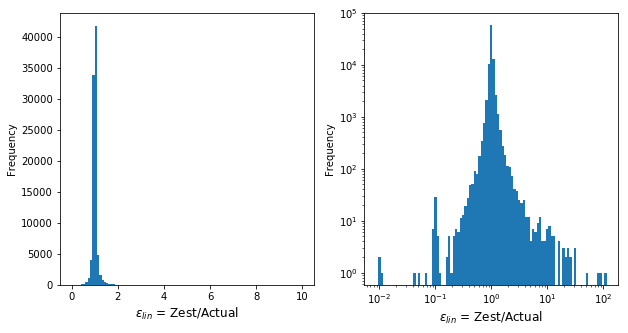

In [84]:

fig, ax = pp.subplots(nrows=1, ncols=2, figsize=[10,5])

ax[0].hist(np.power(np.e,df_train.logerror), bins = 100, range=(0,10))
ax[0].set_xlabel('$\epsilon_{lin}$ = Zest/Actual', fontsize='large')
ax[0].set_ylabel('Frequency')


ax[1].hist(np.power(np.e,df_train.logerror), 
           bins = np.power(np.e,df_train.logerror).max()**np.linspace(-1,1,100))
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('$\epsilon_{lin}$ = Zest/Actual', fontsize='large')
ax[1].set_ylabel('Frequency')

pp.show()

Note that, unlike many traditional cost functions such as MSE, MAE, MAPE etc, the logerror does not equaly weight two predictions that are symetric around an actual value. For example, if the sale price was 100,000 and one prediction gave 120,000 and the other 80,000, the traditional cose functions would give the same error to both predictions. On the contrary, the log error favours predicitions that are closer in percentage to the value, in which case 120,000 would win here.